In [278]:
import seaborn as sns

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get Trial Database

In [392]:
# config = Config('/home/robert/Research/hyperparamopt/Trial Data/DHFR/Random-GMRQ-2/alpha_angle.yaml')
# df = config.trial_results()
df = pd.read_pickle('/Users/robert_arbon/Google Drive/Research/Hyperparameter_Optimisation/Code/DHFR/'
                    'Random-GMRQ-CSE/cse_trials_0-159.pickl')

In [393]:
print(df.shape)
df.head()
df.rename(columns={'project_name': 'feature'}, inplace=True)
df.columns


(160, 21)


Index(['completed', 'config_sha1', 'elapsed', 'host', 'id', 'mean_test_score',
       'mean_train_score', 'n_test_samples', 'n_train_samples', 'parameters',
       'feature', 'started', 'status', 'test_scores', 'traceback',
       'train_scores', 'user', 'cse_test_scores', 'cse_train_gaps',
       'cse_train_n_timescales', 'cse_train_scores'],
      dtype='object')

In [394]:
df = df.loc[:,['id', 'feature', 'parameters', 'test_scores', 'train_scores', 'cse_test_scores', 
               'cse_train_gaps', 'cse_train_n_timescales' , 'cse_train_scores']]
df.head()

,id,feature,parameters,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores
0,340,alpha_angle,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.924020334874508, 2.9698606568357997, 2.9831...","[2.9965153906667426, 2.9945713180323463, 2.998...","[1.98896566959, 4.52260027142, 3.73281691888, ...","[4.94509270445, 3.970741425, 4.39236861362, 4....","[1, 4, 3, 1, 1]","[1.99958729591, 4.97167489458, 3.97432856575, ..."
1,1513,kappa_angle,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.9747090975733688, 2.956909241153384, 2.9847...","[2.9949107356491385, 2.998797693837137, 2.9991...","[4.41895822097, 1.98324126527, 1.9663170355, 1...","[4.5429873137, 2.59523900649, 8.27169428465, 5...","[4, 1, 1, 1, 4]","[4.99598169925, 1.9989900454, 1.99982494769, 1..."
2,994,alpha_angle,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.986630876845032, 2.9609057675592125, 2.9206...","[2.9924662800496753, 2.9969213988757035, 2.998...","[3.02908876125, 3.36369482721, 2.53455903658, ...","[4.34092241682, 2.73642137823, 19.7070544445, ...","[4, 3, 2, 1, 2]","[4.97542342825, 3.92931343168, 2.9970544041, 1..."
3,1554,kappa_angle,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.9632493672161226, 2.9543186829265533, 2.986...","[2.99880160038949, 2.9897071784365, 2.98437574...","[2.70068881247, 1.97125093664, 2.95310862649, ...","[3.24934697605, 6.79625135015, 20.1361241774, ...","[2, 1, 2, 1, 2]","[2.99713521934, 1.99750490984, 2.99954926239, ..."
4,1069,alpha_angle,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.951007543461104, 2.9585031051238304, 2.9578...","[2.997938376605804, 2.993601788874842, 2.99277...","[1.99052590304, 1.99600750949, 1.98926369224, ...","[6.08217110928, 34.1493087487, 16.2779303847, ...","[1, 1, 1, 3, 1]","[1.99949742554, 1.99990897442, 1.99960542692, ..."


## Calculate mean GMRQ-2 and GMRQ-CSE


In [395]:
def safe_mean(x):
    try:
        return np.array(x).mean()
    except TypeError:
        return np.nan

def safe_error(x):
    try:
        return np.array(x).std()
    except TypeError:
        return np.nan


In [396]:
# Note - this assumes that the folds are all the same size.  This is fine for DHFR as all trajectories are 1000 ns long. 

observables = [ 'test_scores','cse_test_scores', 'cse_train_gaps']

for observable in observables:
#         df[observable+'_error'] = df.loc[:, observable].apply(safe_error)
        df[observable+'_mean'] = df.loc[:, observable].apply(safe_mean)

## Remove results with errors

In [397]:
print(df.shape)
df.dropna(axis=0, inplace=True)
print(df.shape)

(160, 12)
(155, 12)


## Generate ranks

In [398]:
df.sort_values(by='test_scores_mean', ascending=False, inplace=True)
df['rank'] = np.arange(df.shape[0])+1
df.sort_values(by='cse_test_scores_mean', ascending=False, inplace=True)
df['cse_rank'] = np.arange(df.shape[0])+1
df.sort_values(by='cse_train_gaps_mean', ascending=False, inplace=True)
df['gaps_rank'] = np.arange(df.shape[0])+1

In [399]:
df.drop(labels=['test_scores_mean', 'cse_test_scores_mean'], inplace=True, axis=1)
from copy import copy
original=copy(df)
df.head()


,id,feature,parameters,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores,cse_train_gaps_mean,rank,cse_rank,gaps_rank
68,66,kappa_angle,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.917310017568221, 2.9799788401717495, 2.9055...","[2.96599004968879, 2.9903523239076524, 2.97516...","[1.96843664498, 1.91199910957, 1.99850745711, ...","[585.605372298, 27.6186821253, 52.5065555457, ...","[1, 1, 1, 1, 1]","[1.99993873959, 1.99888037923, 1.99969364538, ...",144.346631,65,149,1
99,111,psi-o_tor,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.8497701072992423, 2.876886939080779, 2.9214...","[2.9635899505216052, 2.9534762664985035, 2.942...","[3.64178590836, 3.32344074089, 1.95736905695, ...","[5.29236519879, 2.9357993761, 104.771271594, 3...","[3, 3, 1, 1, 1]","[3.99033524105, 3.91690707104, 1.9998197383, 1...",111.223211,95,94,2
84,1381,kappa_angle,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.9272046491397203, 2.8921377734015916, 2.904...","[2.978374534207249, 2.9923008456548845, 2.9747...","[1.99514476312, 1.99272646652, 1.91544607032, ...","[46.0225973328, 13.7279285852, 138.888652539, ...","[1, 1, 1, 1, 1]","[1.99925570392, 1.99852122465, 1.99979091056, ...",94.314679,80,147,3
148,1548,psi-o_tor,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.908194180807401, 2.973039831295191, 2.83103...","[2.9462855525219585, 2.997155463631855, 2.9914...","[1.99980886706, 1.45466015597, 1.92869187179, ...","[8.0405004019, 89.4697107788, 118.949400001, 1...","[1, 1, 1, 1, 1]","[1.99990222895, 1.99992363965, 1.99969582383, ...",47.998810,144,154,4
74,1531,kappa_angle,"{'cluster__max_no_improvement': 10, 'msm__reve...","[2.9321853218498544, 2.965829474038287, 2.9369...","[2.9765366558424056, 2.974254485293475, 2.9706...","[1.99315016969, 1.98507409948, 1.99581359668, ...","[42.6065702572, 28.8620967844, 19.2141146258, ...","[1, 1, 1, 1, 1]","[1.99939287654, 1.99889581914, 1.99815948579, ...",47.298978,71,145,5


## Extract parameters

In [400]:
params = ['cluster__n_clusters', 'tica__n_components', 'tica__lag_time']
for param in params:
    df[param] = df.loc[:, 'parameters'].apply(lambda x: x[param])

In [401]:
df.drop(labels='parameters', axis=1, inplace=True)
df.sort_values(inplace=True, by='id', axis=0)


## Expand the trial results so Seaborn can make interesting plots

In [402]:
to_expand = ['test_scores', 'train_scores', 'cse_test_scores','cse_train_gaps', 'cse_train_n_timescales', 
            'cse_train_scores'] 

In [403]:
df_expanded = []
for col in to_expand:    
    s = df.apply(lambda x: pd.Series(x[col]),axis=1).stack().reset_index(level=1, drop=True)
    s.name=col
    df_expanded.append(pd.DataFrame(s))
    df.drop(labels=col, axis=1, inplace=True)
    
    

In [404]:
df_expanded = pd.concat(df_expanded, axis=1)
trials = df.join(df_expanded)
trials.head()

,id,feature,cse_train_gaps_mean,rank,cse_rank,gaps_rank,cluster__n_clusters,tica__n_components,tica__lag_time,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.924020,2.996515,1.988966,4.945093,1,1.999587
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.969861,2.994571,4.522600,3.970741,4,4.971675
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.983123,2.998468,3.732817,4.392369,3,3.974329
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.986086,2.999264,1.992578,4.377805,1,1.999112
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.982809,2.998268,1.989154,4.144677,1,1.999495


## Scores. 


In [405]:
trials.dtypes

id                          int64
feature                    object
cse_train_gaps_mean       float64
rank                        int64
cse_rank                    int64
gaps_rank                   int64
cluster__n_clusters         int64
tica__n_components          int64
tica__lag_time              int64
test_scores               float64
train_scores              float64
cse_test_scores           float64
cse_train_gaps            float64
cse_train_n_timescales      int64
cse_train_scores          float64
dtype: object

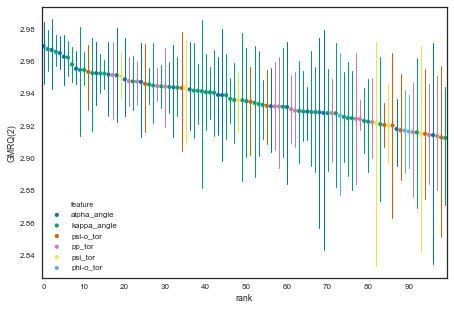

In [413]:
import numpy as np
import matplotlib.ticker as ticker

df2 = trials.sort_values(by='rank').iloc[:500,]
sns.set_context('paper', font_scale=1)
sns.set_style('white')
sns.set_palette('colorblind')
# fig, ax = plt.subplots(figsize=(10,10))

ax = sns.pointplot(x='rank', y='test_scores', hue='feature', data=df2, errwidth=1, scale=.5, join=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set_ylabel('GMRQ(2)')
fig = plt.gcf()
plt.tight_layout()
plt.savefig('score_results.pdf')

In [377]:
df2.head()

,id,project_name,cse_train_gaps_mean,rank,cse_rank,gaps_rank,cluster__n_clusters,tica__n_components,tica__lag_time,test_scores,train_scores,cse_test_scores,cse_train_gaps,cse_train_n_timescales,cse_train_scores
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.924020,2.996515,1.988966,4.945093,1,1.999587
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.969861,2.994571,4.522600,3.970741,4,4.971675
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.983123,2.998468,3.732817,4.392369,3,3.974329
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.986086,2.999264,1.992578,4.377805,1,1.999112
0,340,alpha_angle,4.366137,1,74,139,415,3,35,2.982809,2.998268,1.989154,4.144677,1,1.999495


In [ ]:
with sns.plotting_context('paper', font_scale=1.5):
    fig, ax = plt.subplots(4)
    ax[0].errorbar(x=df_ordered['rank'], y=df_ordered['test_scores_mean'], yerr=df_ordered['test_scores_error'])
    ax[1].errorbar(x=df_ordered['rank'], y=df_ordered['cse_test_scores_mean'], yerr=df_ordered['cse_test_scores_error'])
    ax[2].errorbar(x=df_ordered['rank'], y=df_ordered['cse_train_gaps_mean'], yerr=df_ordered['cse_train_gaps_error'])
    ax[2].set_yscale('log')
    ax[3].errorbar(x=df_ordered['rank'], y=df_ordered['cse_train_n_timescales_mean'], yerr=df_ordered['cse_train_n_timescales_error'])
plt.tight_layout()